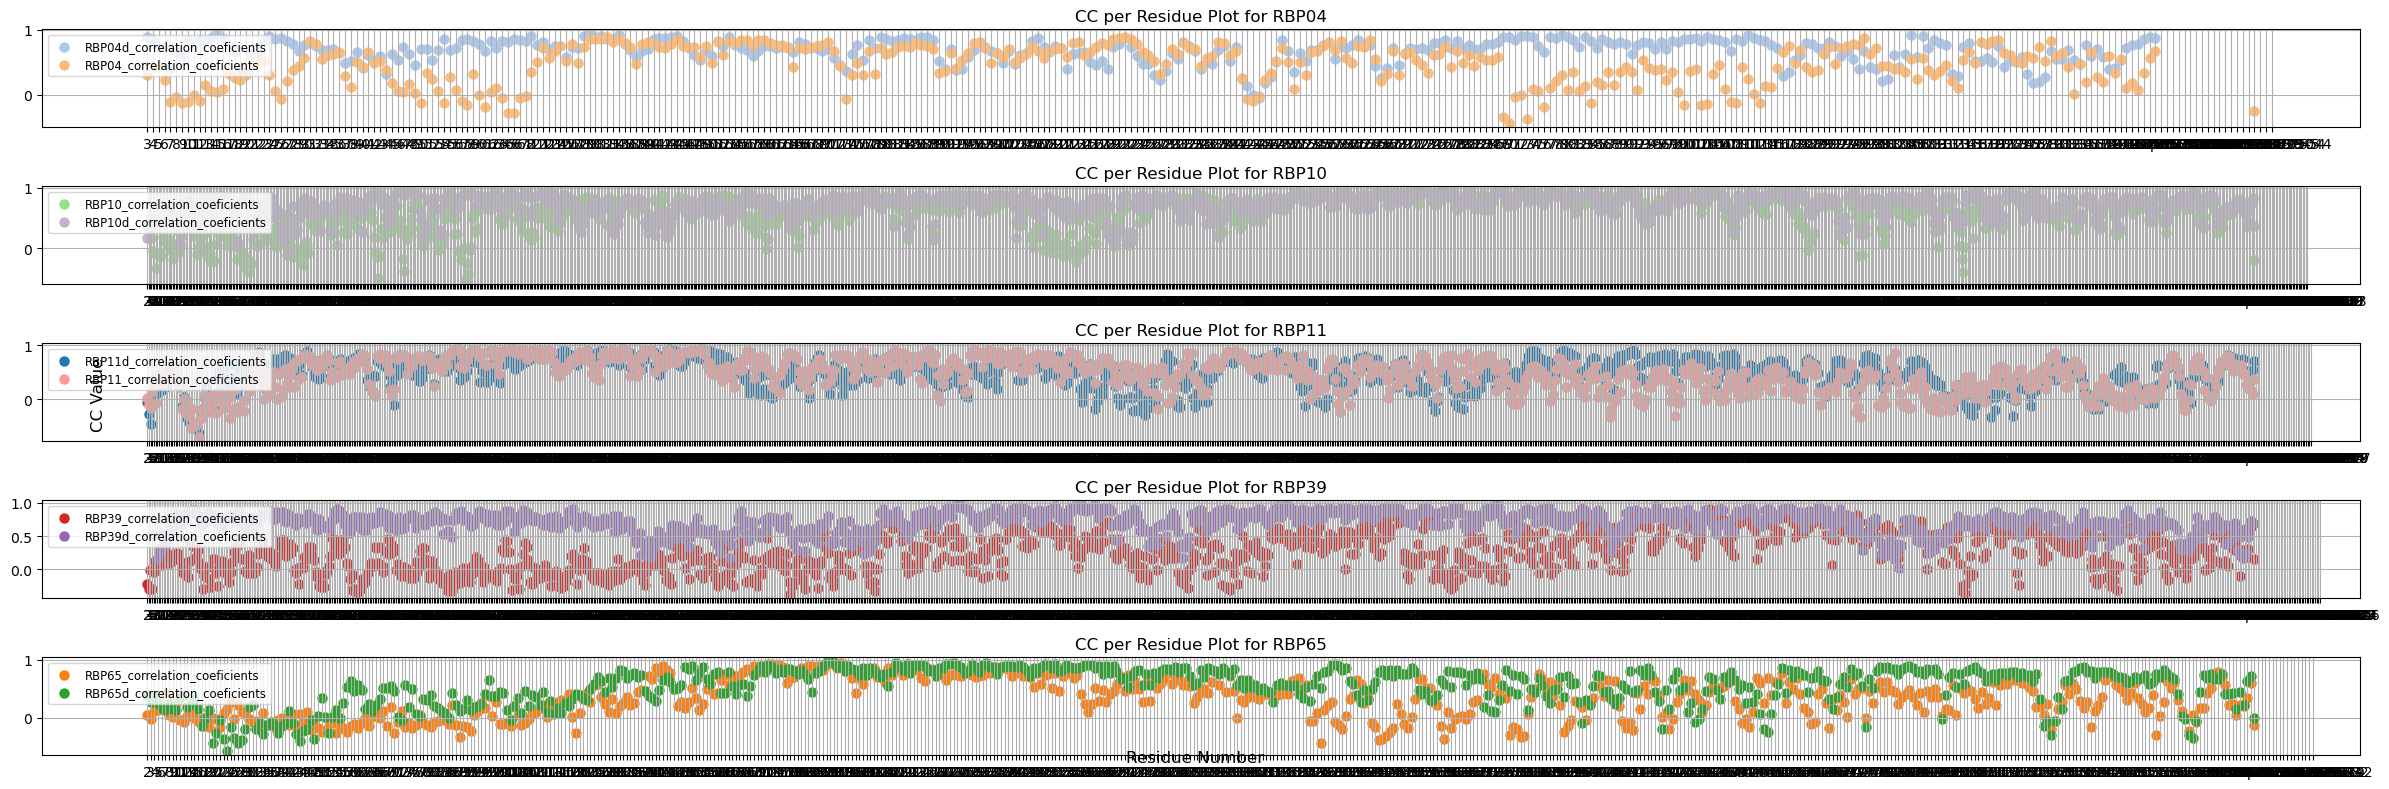

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the folder containing your .txt files
folder_path = '/Users/shj152/Library/CloudStorage/OneDrive-UniversityofCopenhagen/PhD/AtlasPaper/data/phenix/cc_results/'  # Change this to your folder path

# List all .txt files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Define the list of RBPs you are interested in
rbp_list = ['RBP04', 'RBP10', 'RBP11', 'RBP39', 'RBP65']

# Initialize subplots for each RBP in rbp_list
fig, axes = plt.subplots(len(rbp_list), 1, figsize=(24, 8), sharex=False, sharey=False)
fig.tight_layout(pad=2.0)

# Define a color cycle for different lines
colors = plt.cm.tab20.colors  # Get a color palette with enough distinct colors

# Loop through all files and process them
for idx, file_name in enumerate(file_list):
    file_path = os.path.join(folder_path, file_name)
    rbp = file_name.split('_')[0].replace('d', '')  # Extract RBP prefix, removing 'd' if present

    if rbp in rbp_list:
        # Find the index of the RBP in rbp_list to plot in the correct axis
        ax_index = rbp_list.index(rbp)
        ax = axes[ax_index]
        
        # Read the data from the .txt file
        df = pd.read_csv(file_path, delim_whitespace=True, skiprows=2, header=None, names=['Chain', 'Residue', 'Amino_Acid', 'CC_Value'])
        df = df.drop_duplicates(subset='Residue', keep='first')
        
        # Extract the file name without extension for labeling
        label = os.path.splitext(file_name)[0]
        
        # Plot the data with the current color in the specific axis
        ax.scatter(df['Residue'], df['CC_Value'], label=label, color=colors[idx % len(colors)], linestyle='-', linewidth=1.5)
        
        # Set the title for each subplot
        ax.set_title(f"CC per Residue Plot for {rbp}")
        ax.grid(True)
        ax.legend(loc='upper left', fontsize='small')

# Set common labels
fig.text(0.5, 0.04, 'Residue Number', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'CC Value', va='center', rotation='vertical', fontsize=12)
plt.grid('off')
# Show the plot
plt.tight_layout()
plt.show()


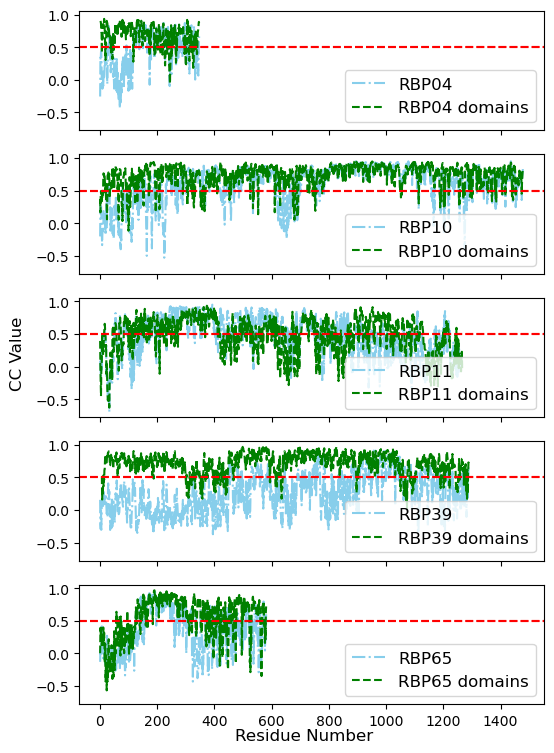

In [110]:
import numpy as np
# Initialize subplots for each RBP in rbp_list
fig, axes = plt.subplots(len(rbp_list), 1, figsize=(6, 9), sharex=True, sharey=True)
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
file_list = np.sort(file_list)
# Define a color cycle for different lines
colors = plt.cm.tab20.colors  # Get a color palette with enough distinct colors
df_store = []
# Loop through all files and process them
for idx, file_name in enumerate(file_list):
    file_path = os.path.join(folder_path, file_name)
    rbp = file_name.split('_')[0].replace('d', '') # Extract RBP prefix, removing 'd' if present

    if rbp in rbp_list:
        # Find the index of the RBP in rbp_list to plot in the correct axis
        ax_index = rbp_list.index(rbp)
        ax = axes[ax_index]
        
        # Read the data from the .txt file
        df = pd.read_csv(file_path, delim_whitespace=True, skiprows=2, header=None, names=['Chain', 'Residue', 'Amino_Acid', 'CC_Value'])
        df = df.drop_duplicates(subset='Residue', keep='first')
        df =  df.sort_values('Residue')
        # Extract the file name without extension for labeling
        label = os.path.splitext(file_name)[0]
        label = label.split('_')[0].replace('d', ' domains')
        df_store.append([ label, np.mean(df['CC_Value']),np.std(df['CC_Value']),np.median(df['CC_Value']),max(df['CC_Value']),min(df['CC_Value'])])
        if 'domains' in label:
            # Plot the data with the current color in the specific axis
            ax.plot(df['Residue'], df['CC_Value'], label=label, color='green', linestyle='--', linewidth=1.5)
        else:
            ax.plot(df['Residue'], df['CC_Value'], label=label, color='skyblue', linestyle='-.', linewidth=1.5)
        ax.axhline(y=0.5, linestyle='--', color='red')
        # Set the title for each subplot
        ax.set_title("")
        #ax.grid(True, axis='y')  # Only show horizontal grid lines
        ax.legend(loc='lower right', fontsize=12)

# Set common labels
fig.text(0.5, 0.07, 'Residue Number', ha='center', fontsize=12)
fig.text(0.01, 0.5, 'CC Value', va='center', rotation='vertical', fontsize=12)

# Apply tight layout with padding
#plt.tight_layout()
plt.show()

df_store = pd.DataFrame(df_store, columns=['RBP','mean CC', ' std CC', 'median CC',  'max CC', 'min CC'])


In [65]:
df_store

,RBP,mean CC,std CC,median CC,max CC,min CC
0,RBP04,0.452640,0.300634,0.512618,0.887166,-0.434830
1,RBP04 domains,0.678803,0.180388,0.716361,0.935064,-0.058159
2,RBP10,0.602908,0.280098,0.685434,0.950132,-0.528902
3,RBP10 domains,0.728856,0.173253,0.777074,0.953461,-0.114898
4,RBP11,0.471723,0.301294,0.521697,0.949490,-0.692465
5,RBP11 domains,0.482308,0.276069,0.530168,0.932855,-0.628556
6,RBP39,0.265624,0.294470,0.264646,0.910584,-0.371595
7,RBP39 domains,0.713215,0.162686,0.743027,0.971971,0.012885
8,RBP65,0.341500,0.333236,0.353866,0.942927,-0.432516
9,RBP65 domains,0.537630,0.321255,0.639463,0.965872,-0.567224


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store CC values per RBP
cc_data = {}

# Loop through all files and process them
for idx, file_name in enumerate(file_list):
    file_path = os.path.join(folder_path, file_name)
    rbp = file_name.split('_')[0]  # Extract RBP prefix, removing 'd' if present


    df = pd.read_csv(file_path, delim_whitespace=True, skiprows=2, header=None, names=['Chain', 'Residue', 'Amino_Acid', 'CC_Value'])
    df = df.drop_duplicates(subset='Residue', keep='first')
    df = df.sort_values('Residue')
        
        # Store CC values in the dictionary with RBP as the key
    cc_data[rbp] = df['CC_Value'].reset_index(drop=True)

# Convert the dictionary to a DataFrame
df_cc = pd.DataFrame(cc_data)



,RBP04,RBP04d,RBP10,RBP10d,RBP11,RBP11d,RBP39,RBP39d,RBP65,RBP65d
0,-0.255222,0.902875,-0.201585,0.372066,0.091514,0.393422,0.155689,0.515505,-0.130104,0.002109
1,0.341629,0.889534,0.367307,0.166181,0.015599,-0.048027,-0.222945,0.160538,0.049339,0.390722
2,0.298778,0.862388,0.366356,0.435605,-0.110151,-0.267972,-0.293490,0.276293,-0.022821,0.282002
3,0.429124,0.733128,0.320279,0.493245,-0.157428,-0.451779,-0.004921,0.241744,0.114396,0.393707
4,0.437880,0.728744,0.167889,0.452899,0.140060,-0.090403,-0.303293,0.335230,0.141679,0.258009
...,...,...,...,...,...,...,...,...,...,...
1473,NaN,NaN,0.355680,0.452250,NaN,NaN,NaN,NaN,NaN,NaN
1474,NaN,NaN,0.619456,0.618719,NaN,NaN,NaN,NaN,NaN,NaN
1475,NaN,NaN,0.728826,0.705584,NaN,NaN,NaN,NaN,NaN,NaN
1476,NaN,NaN,0.755218,0.780952,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
from scipy import stats

# Calculate the overall mean and standard deviation of CC values
overall_mean = df_cc.mean().mean()
overall_std = df_cc.stack().std()

# Performing the Z-test for each RBP's mean CC value
df_store['z_score'] = (df_store['mean CC'] - overall_mean) / overall_std


,RBP,mean CC,std CC,median CC,max CC,min CC,z_score
0,RBP04,0.452640,0.300634,0.512618,0.887166,-0.434830,-0.245682
1,RBP04 domains,0.678803,0.180388,0.716361,0.935064,-0.058159,0.496358
2,RBP10,0.602908,0.280098,0.685434,0.950132,-0.528902,0.247345
3,RBP10 domains,0.728856,0.173253,0.777074,0.953461,-0.114898,0.660581
4,RBP11,0.471723,0.301294,0.521697,0.949490,-0.692465,-0.183072
5,RBP11 domains,0.482308,0.276069,0.530168,0.932855,-0.628556,-0.148344
6,RBP39,0.265624,0.294470,0.264646,0.910584,-0.371595,-0.859280
7,RBP39 domains,0.713215,0.162686,0.743027,0.971971,0.012885,0.609261
8,RBP65,0.341500,0.333236,0.353866,0.942927,-0.432516,-0.610334
9,RBP65 domains,0.537630,0.321255,0.639463,0.965872,-0.567224,0.033168


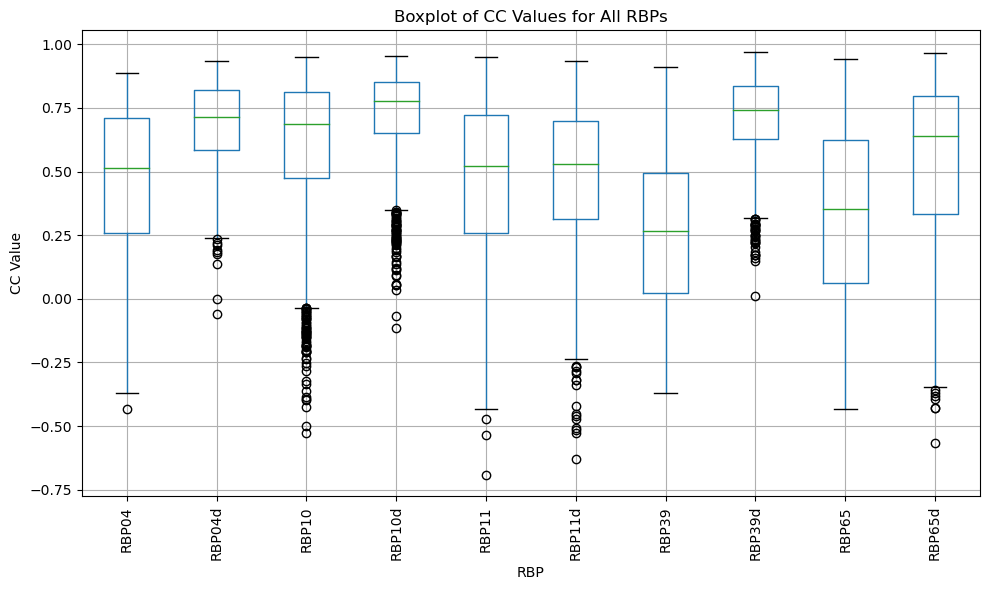

In [77]:
plt.figure(figsize=(10, 6))
df_cc.boxplot()
plt.title('Boxplot of CC Values for All RBPs')
plt.xlabel('RBP')
plt.ylabel('CC Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


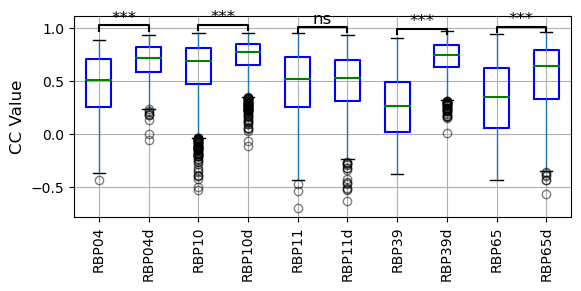

{'RBP65': {'z_stat': -10.204616505909303,
  'p_value': 1.7966935124330334e-23,
  'significance': '***'},
 'RBP39': {'z_stat': -47.721919058246954,
  'p_value': 0.0,
  'significance': '***'},
 'RBP11': {'z_stat': -0.921242902221706,
  'p_value': 0.35701212681015126,
  'significance': 'ns'},
 'RBP04': {'z_stat': -11.9944737335837,
  'p_value': 1.0675824797456125e-29,
  'significance': '***'},
 'RBP10': {'z_stat': -14.696894441680557,
  'p_value': 6.184648051283221e-47,
  'significance': '***'}}

In [112]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Given the dataset and loaded files
# df_cc is the dataframe containing the CC values, column names are RBPs
# Assuming df_cc from previous code context

# Extract unique root RBPs (e.g., RBP04 from RBP04 and RBP04d)
root_rbps = list({col.replace('d', '') for col in df_cc.columns})

# Run Z-test for each pair of root RBP and RBP with 'd' suffix
z_results = {}

for root_rbp in root_rbps:
    if root_rbp in df_cc.columns and f"{root_rbp}d" in df_cc.columns:
        # Get data for the root RBP and its corresponding 'd' version
        data1 = df_cc[root_rbp].dropna()
        data2 = df_cc[f"{root_rbp}d"].dropna()
        
        # Perform Z-test for the means
        z_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)  # Using Welch's t-test
        
        # Store the results
        z_results[root_rbp] = {"z_stat": z_stat, "p_value": p_value}

        # Print significance stars for the boxplot
        if p_value < 0.001:
            significance = "***"
        elif p_value < 0.01:
            significance = "**"
        elif p_value < 0.05:
            significance = "*"
        else:
            significance = "ns"  # Not significant

        z_results[root_rbp]["significance"] = significance

# Plotting the boxplot again with significance annotations
plt.figure(figsize=(6, 3))
boxprops = dict(linestyle='-', linewidth=1.5, color='blue')
flierprops = dict(marker='o', color='red', alpha=0.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='green')

df_cc.boxplot(boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
positions = [1,3,5,7,9]
# Annotate the plot with significance stars for each root RBP pair
for i, root_rbp in enumerate(root_rbps):
    if root_rbp in z_results:
        significance = z_results[root_rbp]["significance"]
        x1, x2 = positions[i], positions[i]+1  # positions of root RBP and RBPd on the x-axis
        y, h, col = df_cc[[root_rbp, f"{root_rbp}d"]].max().max() + 0.01, 0.05, 'k'  # y position, height, color
        
        # Draw lines to indicate the comparison
        plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
        plt.text((x1 + x2) * 0.5, y + h, significance, ha='center', va='bottom', color=col, fontsize=12)

# Set plot labels and title
#plt.title('Boxplot of CC Values for All RBPs with Significance Annotations')
#plt.xlabel('RBP')
plt.ylabel('CC Value',fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Display the z-test results
z_results


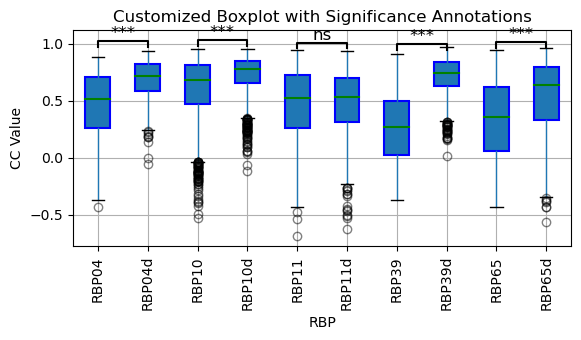

{'RBP65': {'z_stat': -10.204616505909303,
  'p_value': 1.7966935124330334e-23,
  'significance': '***'},
 'RBP39': {'z_stat': -47.721919058246954,
  'p_value': 0.0,
  'significance': '***'},
 'RBP11': {'z_stat': -0.921242902221706,
  'p_value': 0.35701212681015126,
  'significance': 'ns'},
 'RBP04': {'z_stat': -11.9944737335837,
  'p_value': 1.0675824797456125e-29,
  'significance': '***'},
 'RBP10': {'z_stat': -14.696894441680557,
  'p_value': 6.184648051283221e-47,
  'significance': '***'}}

In [95]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming df_cc from previous context
# Extract unique root RBPs (e.g., RBP04 from RBP04 and RBP04d)
root_rbps = list({col.replace('d', '') for col in df_cc.columns})

# Run Z-test for each pair of root RBP and RBP with 'd' suffix
z_results = {}

for root_rbp in root_rbps:
    if root_rbp in df_cc.columns and f"{root_rbp}d" in df_cc.columns:
        # Get data for the root RBP and its corresponding 'd' version
        data1 = df_cc[root_rbp].dropna()
        data2 = df_cc[f"{root_rbp}d"].dropna()
        
        # Perform Z-test for the means
        z_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)  # Using Welch's t-test
        
        # Store the results
        z_results[root_rbp] = {"z_stat": z_stat, "p_value": p_value}

        # Print significance stars for the boxplot
        if p_value < 0.001:
            significance = "***"
        elif p_value < 0.01:
            significance = "**"
        elif p_value < 0.05:
            significance = "*"
        else:
            significance = "ns"  # Not significant

        z_results[root_rbp]["significance"] = significance

# Plotting the boxplot again with significance annotations
plt.figure(figsize=(6, 3.5))
boxprops = dict(linestyle='-', linewidth=1.5, color='blue')
flierprops = dict(marker='o', color='red', alpha=0.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='green')

# Create the boxplot
df_cc.boxplot(boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, patch_artist=True)

# Access the current plot and customize the colors
ax = plt.gca()
colors = ['lightblue', 'lightyellow']  # More colors if needed

for patch, color in zip(ax.artists, colors):
    patch.set_facecolor(color)

# Annotate the plot with significance stars for each root RBP pair
for i, root_rbp in enumerate(root_rbps):
    if root_rbp in z_results:
        significance = z_results[root_rbp]["significance"]
        x1, x2 = positions[i], positions[i] + 1  # positions of root RBP and RBPd on the x-axis
        y, h, col = df_cc[[root_rbp, f"{root_rbp}d"]].max().max() + 0.01, 0.05, 'k'  # y position, height, color
        
        # Draw lines to indicate the comparison
        plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
        plt.text((x1 + x2) * 0.5, y + h, significance, ha='center', va='bottom', color=col, fontsize=12)

# Set labels and title
plt.title('Customized Boxplot with Significance Annotations')
plt.xlabel('RBP')
plt.ylabel('CC Value')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot with significance annotations
plt.show()

# Display the z-test results
z_results
